# **Group project: Real or Not? NLP with Disaster Tweets**
## **Data Mining & Machine Learning 2020 - University of Lausanne**
## **Group Alpina [AIcrowd]**

### 🕵️ **Project Description**

Twitter has become a popular social network for many users. However, it is also used to relay fake news.  

The goal of this project is to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t.  

To train the model, we have access to a dataset of 6,471 tweets that were already classified (0 = fake news tweets, 1 = real news tweets).

### 📦 **Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 📂 **Load Data**

#### **Train Data**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mbayle98/DMML2020-Alpina/main/Data/training_data.csv")
df.head(10)

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1
5,6669,landslide,Scotland,FreeBesieged: .MartinMJ22 YouGov Which '#Tory ...,1
6,9772,trapped,New York City,Billionaires have a plan to free half a billio...,0
7,10361,weapons,Multinational *****,@JamesMelville Some old testimony of weapons u...,0
8,1953,burning%20buildings,Los Angeles,Ali you flew planes and ran into burning build...,0
9,9586,thunder,NaN,The thunder shook my house woke my sister and ...,1


In [4]:
print("There are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns in the dataset.")

There are 6471 rows and 5 columns in the dataset.


#### **Test Data**

In [5]:
df_test = pd.read_csv("https://raw.githubusercontent.com/mbayle98/DMML2020-Alpina/main/Data/%20test_data.csv")
df_test.head(10)

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball
5,10020,twister,NaN,Brain twister let drop up telly structuring ca...
6,8676,sinkhole,"San Diego, CA",RT twit_san_diego 'Possible sinkhole disrupts ...
7,3131,debris,NaN,Aircraft debris found on island is from MH370 ...
8,2195,catastrophic,"Dublin, Ireland",'Kessler Syndrome' is the name for the catastr...
9,3484,derailed,DC,So a train derailed and instead of me getting ...


### 📐 **Base Rate**
Base rate calculated on the original train data (unmodified)

In [6]:
base_rate = max(df.value_counts('target'))/df.shape[0]
print('Base rate:', round(base_rate,2))

Base rate: 0.57


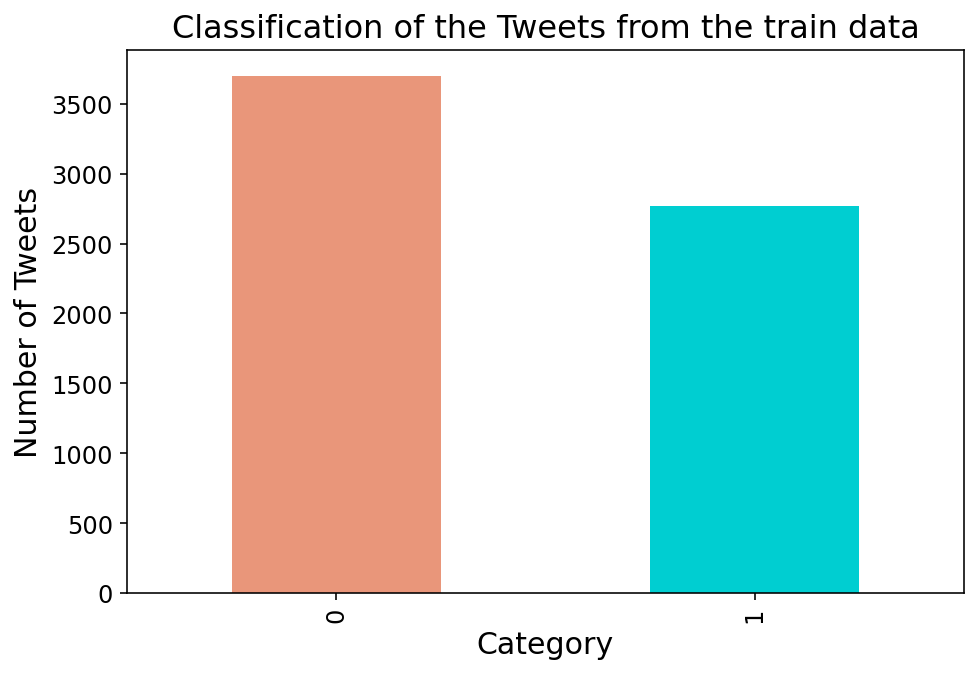

In [7]:
ax = df['target'].value_counts().plot(kind = 'bar', figsize = (7.5,5), color = ('darksalmon', 'darkturquoise'))
ax.set_title('Classification of the Tweets from the train data', size = 16)
ax.set_xlabel('Category', size = 15)
ax.set_ylabel('Number of Tweets', size = 15)
ax.set_xticklabels([0, 1], size = 12)
ax.set_yticklabels(range(0,4000,500), size = 12)
plt.rcParams['font.family'] = 'sans-serif'
plt.show()

In [8]:
print('Number of Tweets by category')
print('Fake news:', df.value_counts('target')[0])
print('Real news:', df.value_counts('target')[1])

Number of Tweets by category
Fake news: 3701
Real news: 2770


### 📊 **More EDA**
Visualization performed on the original train data (unmodified)

In [9]:
# Color templates
color_1 = ['dimgray', 'dimgrey', 'gray', 'grey', 'darkgray', 'darkgrey', 'silver', 'lightgray', 'lightgrey', 'gainsboro']
color_2 = ['lightcoral', 'indianred', 'salmon', 'tomato', 'darksalmon', 'coral', 'lightsalmon', 'sandybrown', 'peachpuff', 'mistyrose']
color_3 = ['green', 'forestgreen', 'seagreen', 'mediumseagreen', 'mediumaquamarine', 'limegreen', 'lime', 'lightgreen', 'palegreen', 'springgreen']

# Improve visibility of axis
matplotlib.rc('xtick', labelsize=12)     
matplotlib.rc('ytick', labelsize=12)

### 💬 **Keywords**

#### 📁 **All Data**

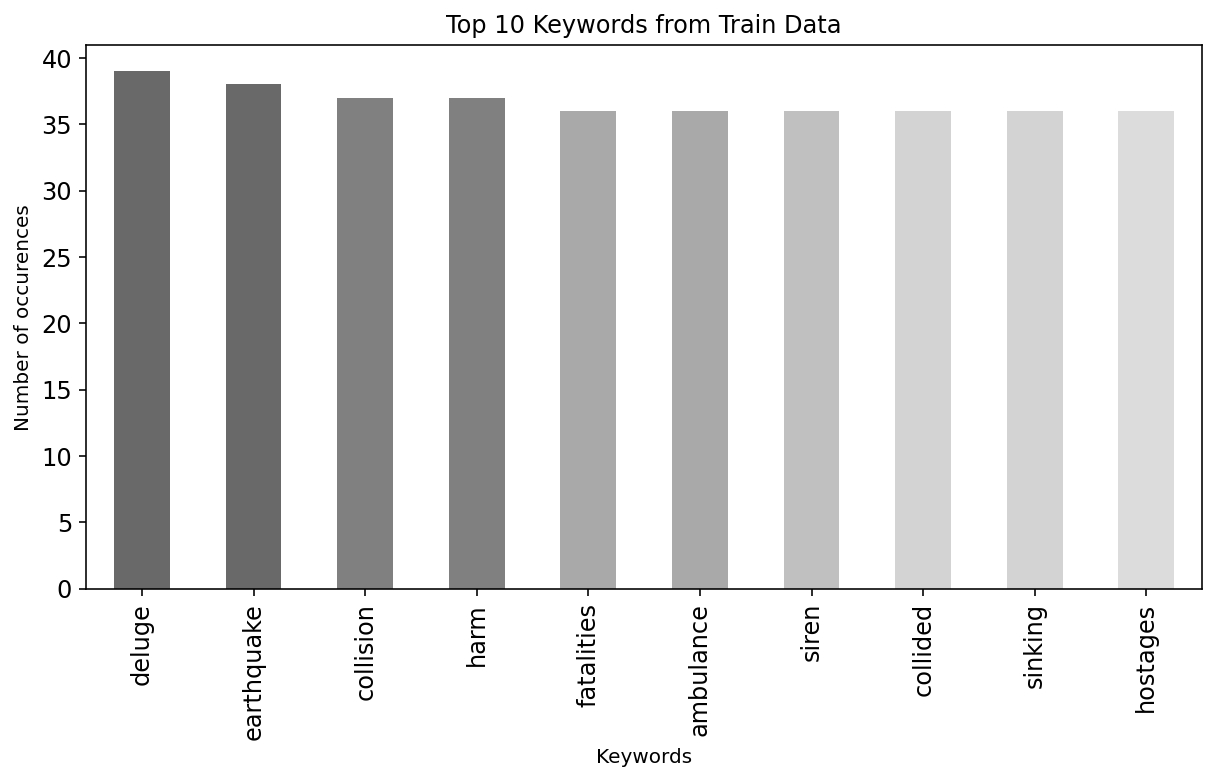

In [10]:
df_keyword = df['keyword'].value_counts()
df_keyword_top_10 = df_keyword[0:10]

df_keyword_top_10.plot.bar(xlabel = 'Keywords', ylabel = 'Number of occurences', title = 'Top 10 Keywords from Train Data', legend = False, grid = False, figsize=(10, 5), color = color_1)

In [11]:
df_keyword_top_10

deluge        39
earthquake    38
collision     37
harm          37
fatalities    36
ambulance     36
siren         36
collided      36
sinking       36
hostages      36
Name: keyword, dtype: int64

#### ❌ **Fake News Tweets**

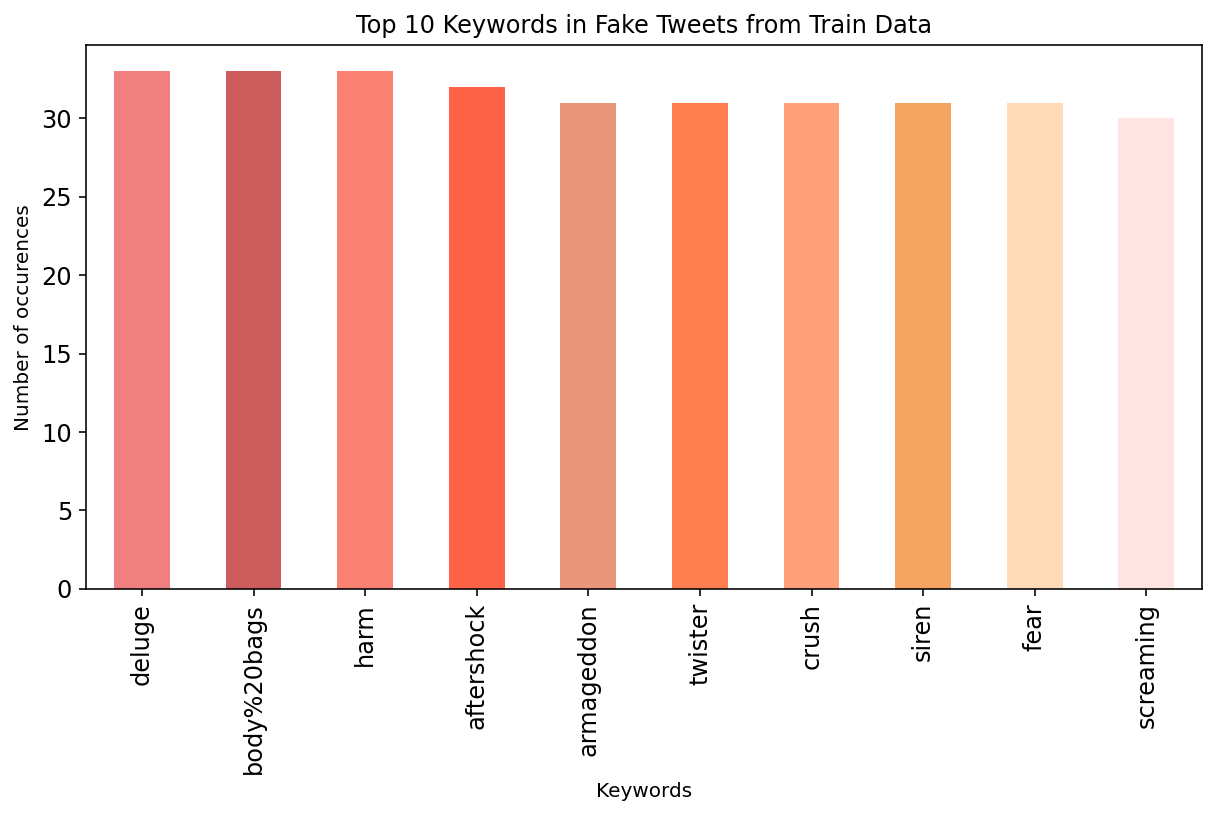

In [19]:
df_keyword_fake = df['keyword'].loc[(df['target'] == 0)].value_counts()
df_keyword_fake_top_10 = df_keyword_fake[0:10]

df_keyword_fake_top_10.plot.bar(xlabel = 'Keywords', ylabel = 'Number of occurences', title = 'Top 10 Keywords in Fake Tweets from Train Data', legend = False, grid = False, figsize=(10, 5), color = color_2)

In [20]:
df_keyword_fake_top_10

deluge         33
body%20bags    33
harm           33
aftershock     32
armageddon     31
twister        31
crush          31
siren          31
fear           31
screaming      30
Name: keyword, dtype: int64

#### ✔️ **Real News Tweets**

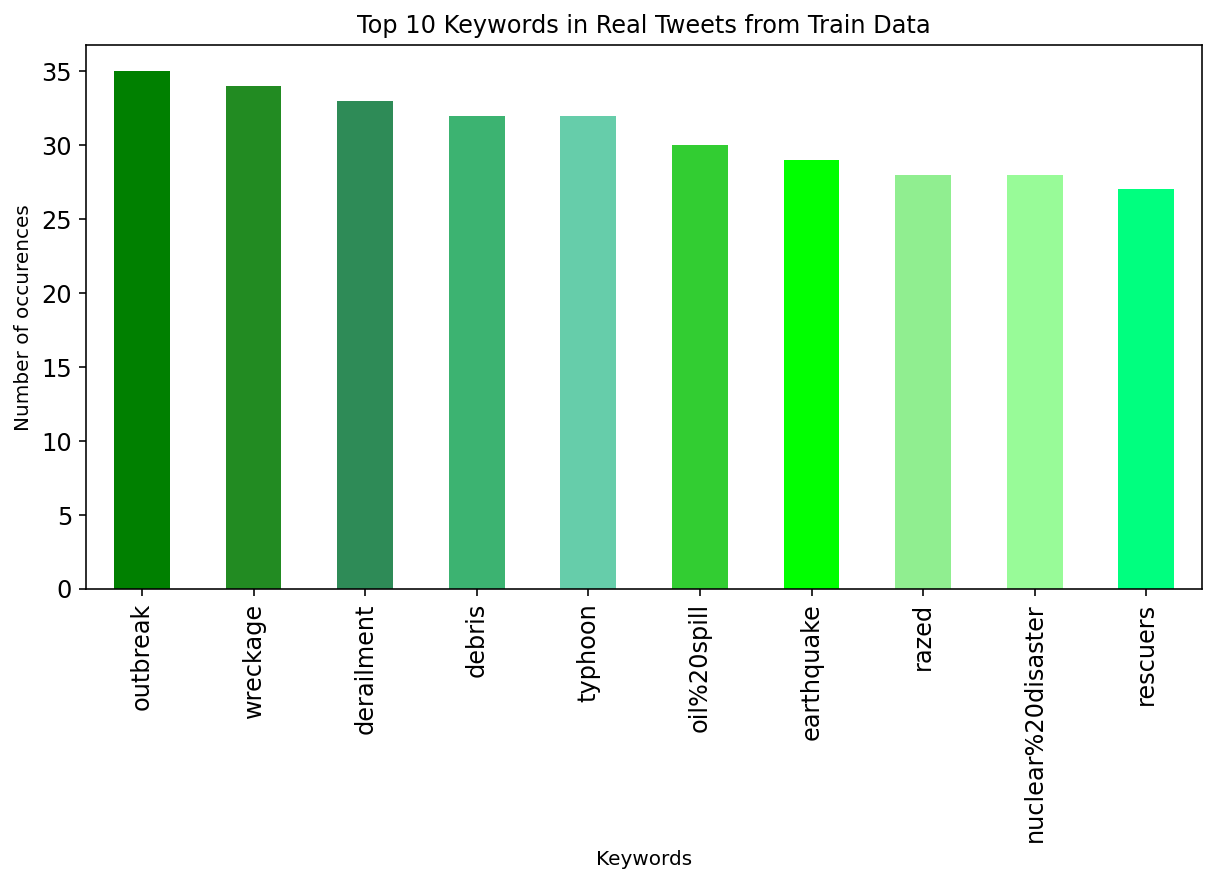

In [14]:
df_keyword_real = df['keyword'].loc[(df['target'] == 1)].value_counts()
df_keyword_real_top_10 = df_keyword_real[0:10]

df_keyword_real_top_10.plot.bar(xlabel = 'Keywords', ylabel = 'Number of occurences', title = 'Top 10 Keywords in Real Tweets from Train Data', legend = False, grid = False, figsize=(10, 5), color = color_3)

In [15]:
df_keyword_real_top_10

outbreak              35
wreckage              34
derailment            33
debris                32
typhoon               32
oil%20spill           30
earthquake            29
razed                 28
nuclear%20disaster    28
rescuers              27
Name: keyword, dtype: int64

### 📍 **Locations**

#### 📁 **All Data**

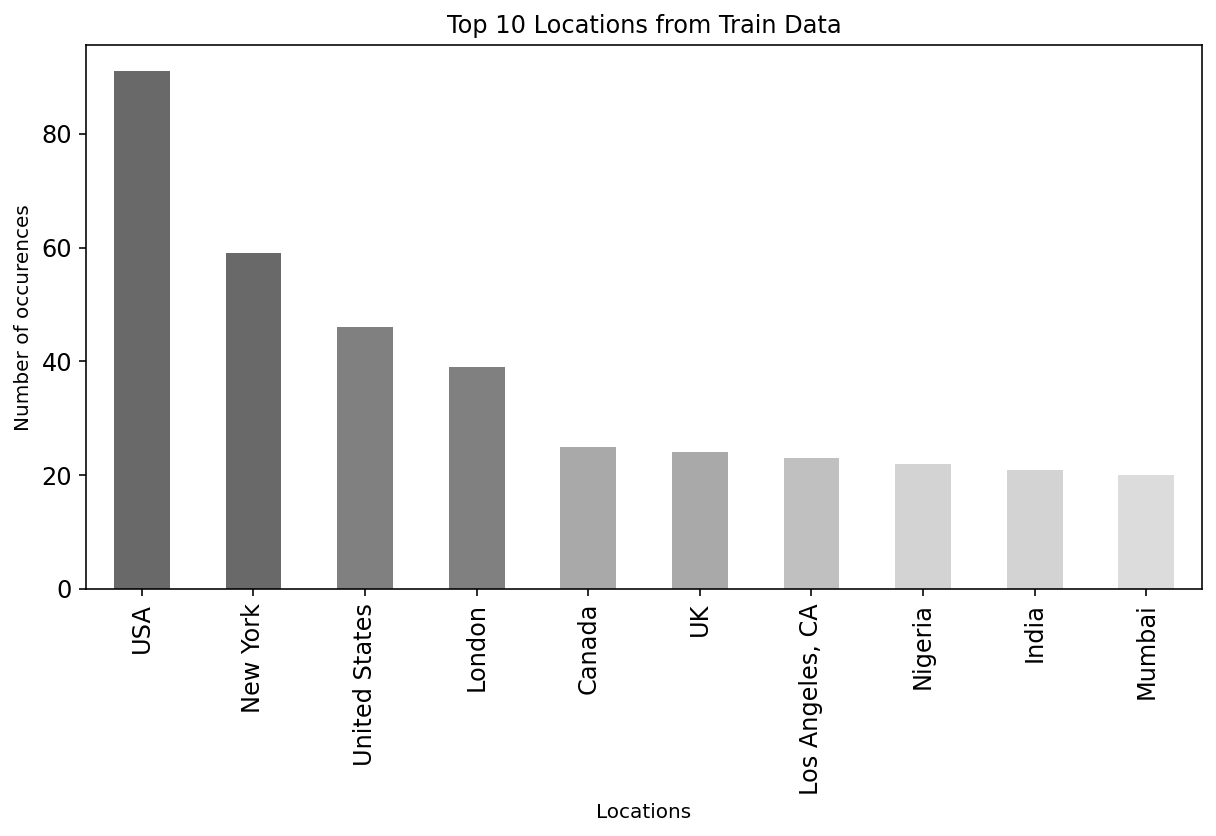

In [27]:
df_location = df['location'].value_counts()
df_location_top_10 = df_location[0:10]

df_location_top_10.plot.bar(xlabel = 'Locations', ylabel = 'Number of occurences', title = 'Top 10 Locations from Train Data', legend = False, grid = False, figsize=(10, 5), color = color_1)

In [22]:
df_location_top_10

USA                91
New York           59
United States      46
London             39
Canada             25
UK                 24
Los Angeles, CA    23
Nigeria            22
India              21
Mumbai             20
Name: location, dtype: int64

#### ❌ **Fake News Tweets**

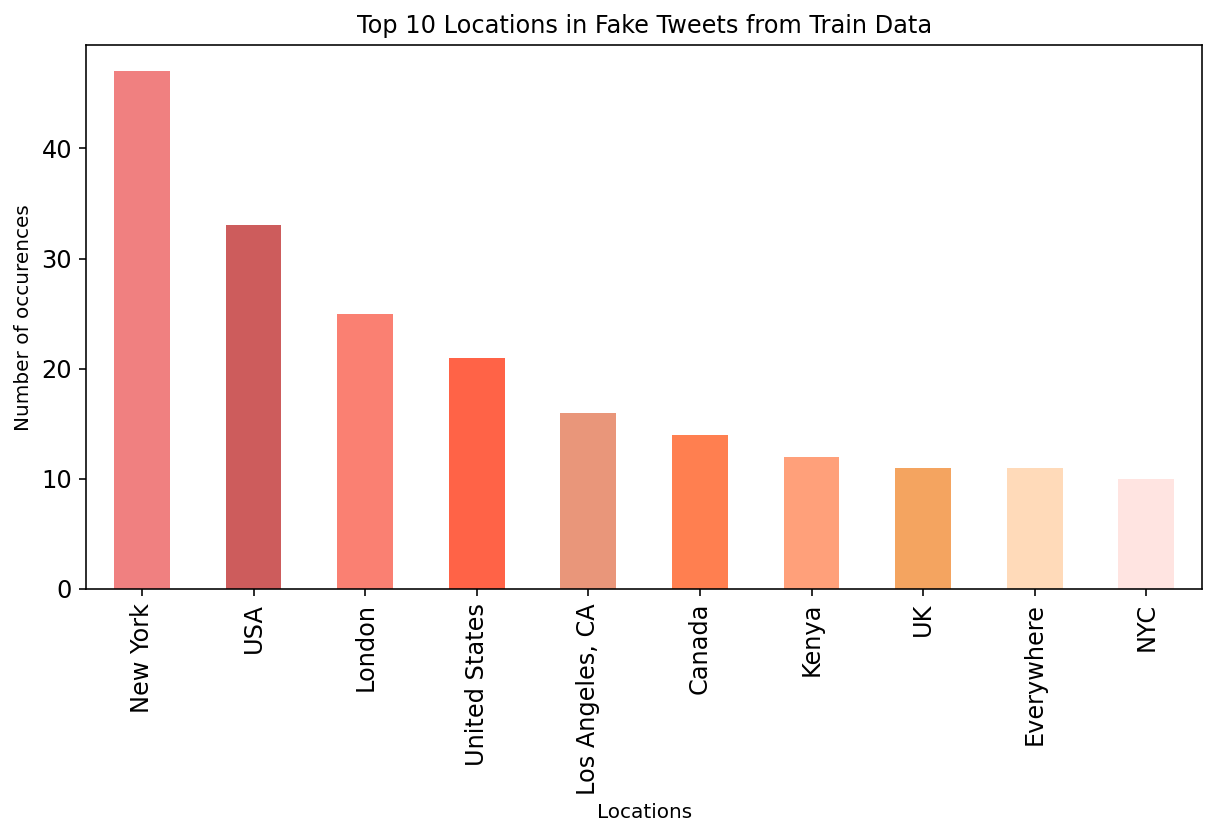

In [26]:
df_location_fake = df['location'].loc[(df['target'] == 0)].value_counts()
df_location_fake_top_10 = df_location_fake[0:10]

df_location_fake_top_10.plot.bar(xlabel = 'Locations', ylabel = 'Number of occurences', title = 'Top 10 Locations in Fake Tweets from Train Data', legend = False, grid = False, figsize=(10, 5), color = color_2)

In [24]:
df_location_fake_top_10

New York           47
USA                33
London             25
United States      21
Los Angeles, CA    16
Canada             14
Kenya              12
UK                 11
Everywhere         11
NYC                10
Name: location, dtype: int64

#### ✔️ **Real News Tweets**

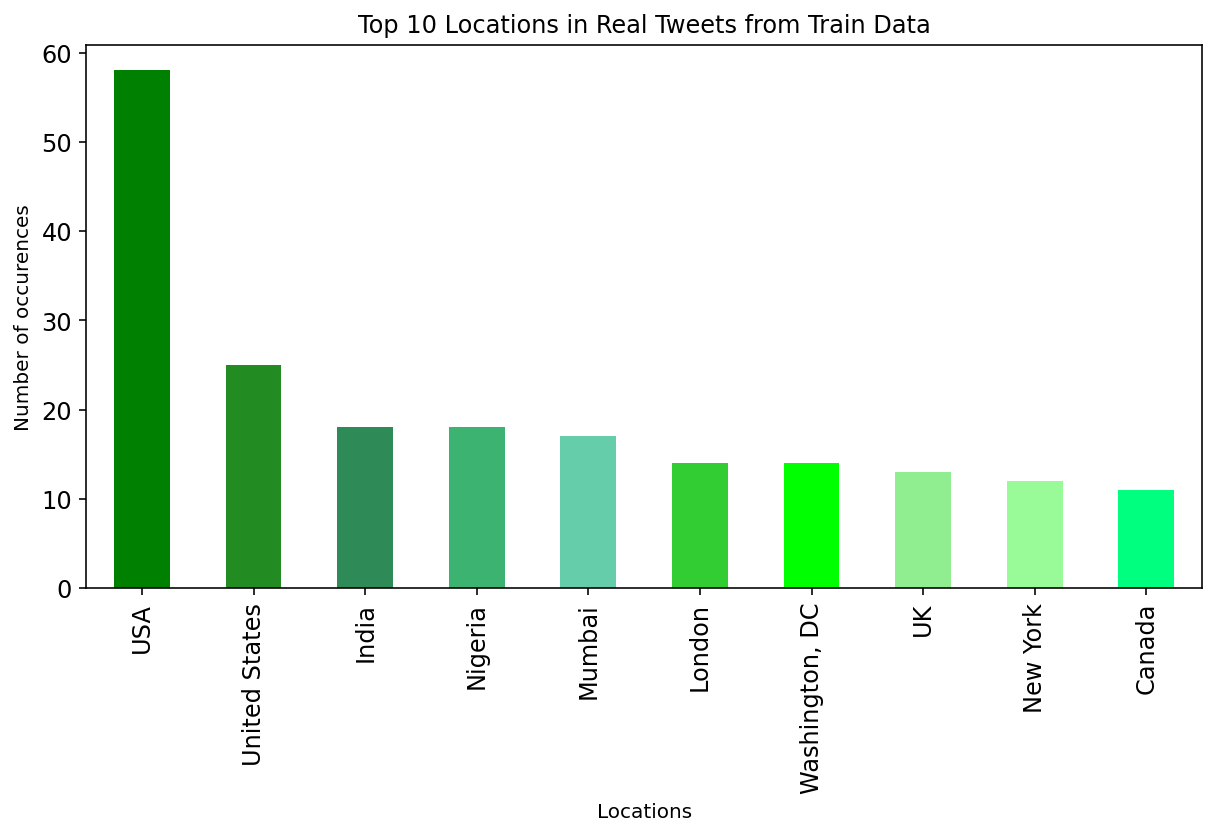

In [25]:
df_location_real = df['location'].loc[(df['target'] == 1)].value_counts()
df_location_real_top_10 = df_location_real[0:10]

df_location_real_top_10.plot.bar(xlabel = 'Locations', ylabel = 'Number of occurences', title = 'Top 10 Locations in Real Tweets from Train Data', legend = False, grid = False, figsize=(10, 5), color = color_3)

In [28]:
df_location_real_top_10

USA               58
United States     25
India             18
Nigeria           18
Mumbai            17
London            14
Washington, DC    14
UK                13
New York          12
Canada            11
Name: location, dtype: int64

### 🧹 **Data Cleaning**

In [29]:
df_1 = df.drop('id', axis = 1)
df_1.duplicated().sum()

41